In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob 

In [19]:
glob.glob(r'/Users/xiao/Downloads/data project/stock_price/individual_stocks_5yr/*.csv')
company_list = [
    r'/Users/xiao/Downloads/data project/stock_price/individual_stocks_5yr/XRX_data.csv',
    r'/Users/xiao/Downloads/data project/stock_price/individual_stocks_5yr/GS_data.csv',
    r'/Users/xiao/Downloads/data project/stock_price/individual_stocks_5yr/SPGI_data.csv',
    r'/Users/xiao/Downloads/data project/stock_price/individual_stocks_5yr/MTB_data.csv',
]

In [20]:
all_data = pd.DataFrame()
for file in company_list:
    df = pd.read_csv(file)
    all_data = pd.concat([all_data, df] , ignore_index=True)

In [ ]:
pd.to_datetime(all_data['date'])

In [27]:
company_names = all_data['Name'].unique()

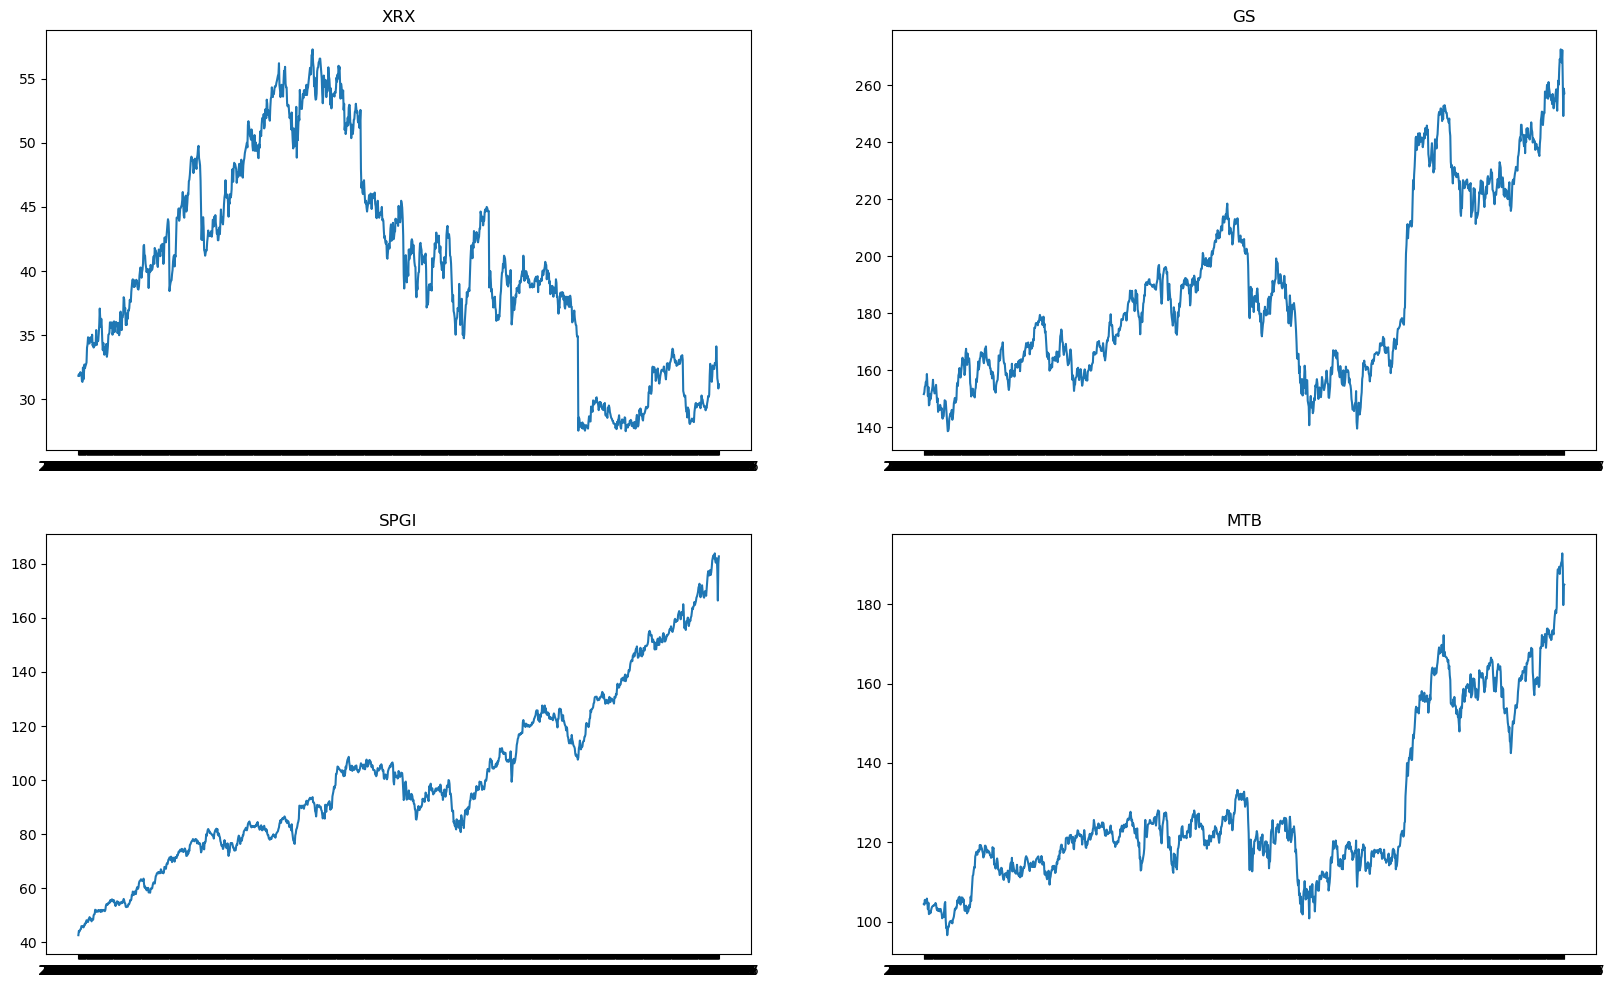

In [29]:
plt.figure(figsize=(20,12))
for index, company in enumerate(company_names,1):
    plt.subplot(2 , 2 , index)
    current_df = all_data[all_data['Name'] == company]
    plt.plot(current_df['date'], current_df['close'] )
    plt.title(company)

In [35]:
window_number = [10, 20, 50]
for window in window_number:
    all_data['close_' + str(window)] = all_data['close'].rolling(window).mean()

In [37]:
all_data.set_index('date', inplace = True)

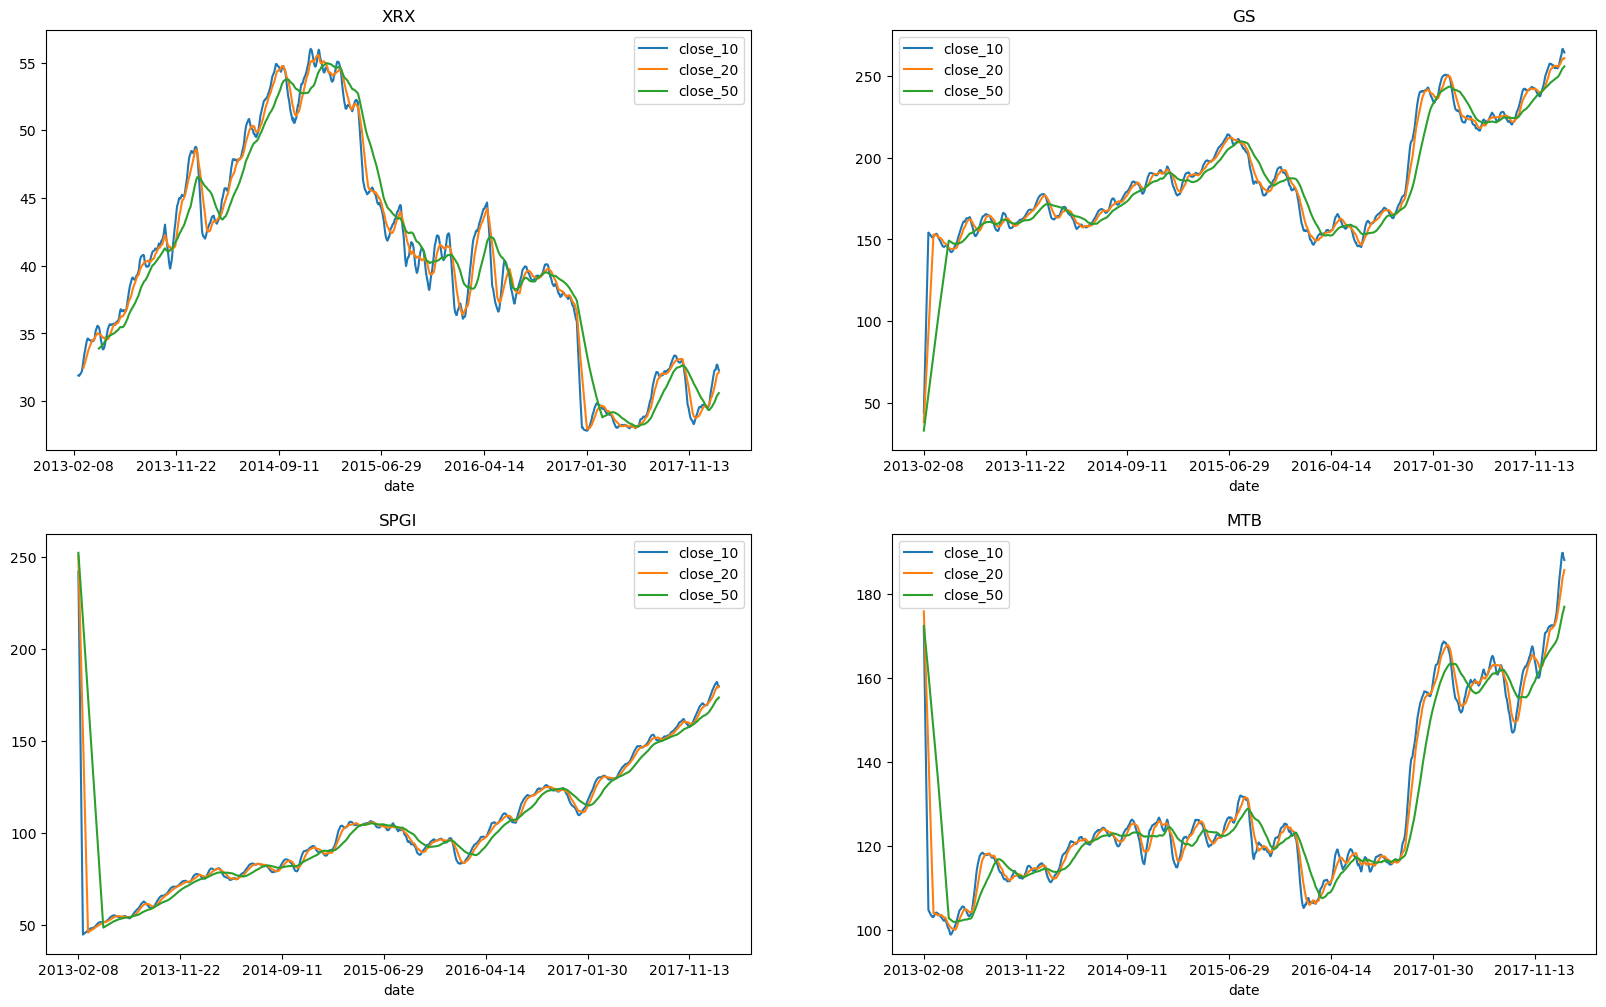

In [43]:
plt.figure(figsize=(20,12))
for index, company in enumerate(company_names,1):
    plt.subplot(2 , 2 , index)
    current_df = all_data[all_data['Name'] == company]
    current_df[['close_10','close_20','close_50' ]].plot(ax=plt.gca())
    plt.title(company)

In [46]:
xrx= pd.read_csv(company_list[0])
gs= pd.read_csv(company_list[1])
spgi= pd.read_csv(company_list[2])
mtb= pd.read_csv(company_list[3])
all_closing = pd.DataFrame()
all_closing['xrx_close'] = xrx['close']
all_closing['gs_close'] = gs['close']
all_closing['spgi_close'] = spgi['close']
all_closing['mtb_close'] = mtb['close']

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

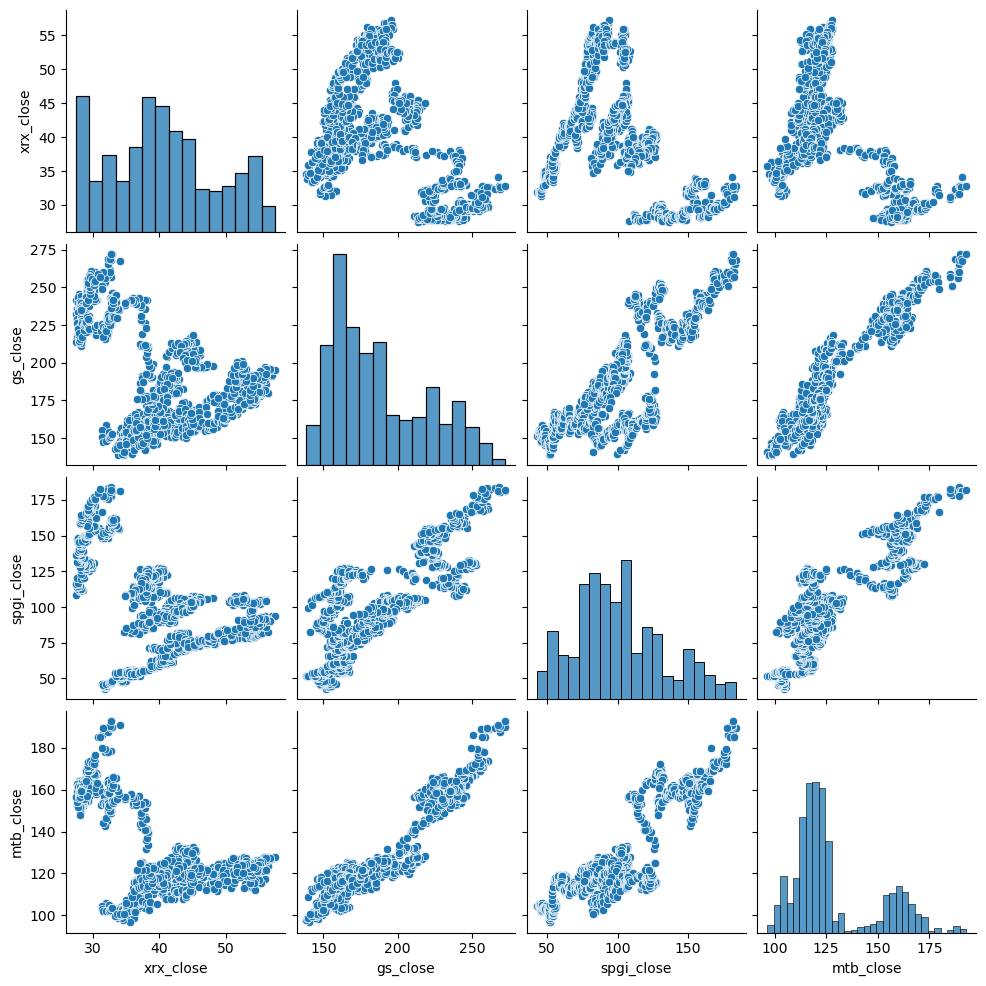

In [48]:
sns.pairplot(all_closing)

In [60]:
daily_return = pd.DataFrame()

for col in all_closing.columns:
    daily_return[col +'_pct_change'] = all_closing[col].pct_change() * 100
    

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

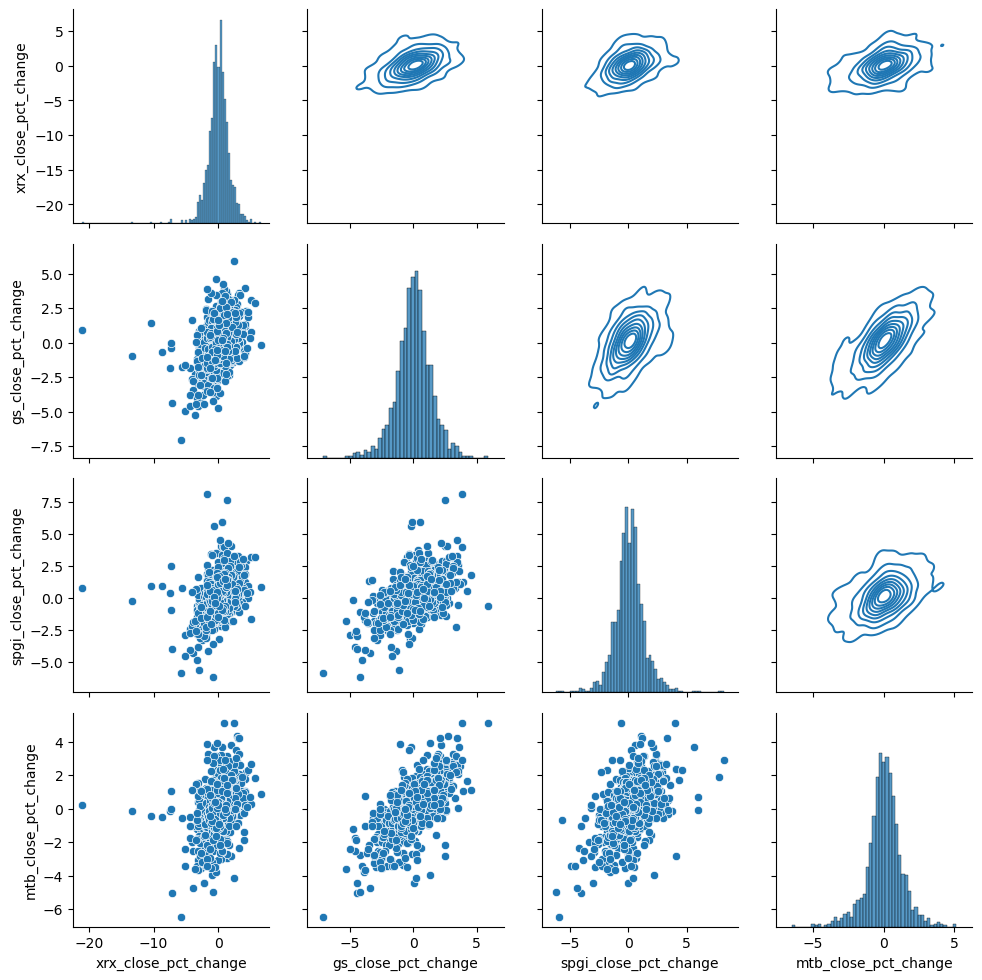

In [66]:
dr = sns.PairGrid(data=daily_return)
dr.map_diag(sns.histplot)
dr.map_lower(sns.scatterplot)
dr.map_upper(sns.kdeplot)

In [68]:
daily_return.corr()

,xrx_close_pct_change,gs_close_pct_change,spgi_close_pct_change,mtb_close_pct_change
xrx_close_pct_change,1.000000,0.429913,0.358898,0.388876
gs_close_pct_change,0.429913,1.000000,0.544831,0.681106
spgi_close_pct_change,0.358898,0.544831,1.000000,0.493634
mtb_close_pct_change,0.388876,0.681106,0.493634,1.000000
